# Word pattern analysis of _The Flying Inkpot_ theater reviews

By Miguel Escobar Varela.

This is the companion code to Chapter 4 of my book _Theater as data: Computational Journeys into theater research_ (University of Michigan Press, 2021).

The book is openly accessible at https://doi.org/10.3998/mpub.11667458.

### *About Juypter and Python*

The following is written as a step-by-step tutorial for users who want to reproduce the results presented in my book.

This is an interactive Jupyter Notebook. For users not familiar with Python and Jupyter I recommend 
Allen Downey's excellent introductory materials at https://allendowney.github.io/ElementsOfDataScience/.

### 1 Importing the relevant libraries

First, we import [Pandas](https://pandas.pydata.org/) to read the data into dataframes and [Matplotlib](https://matplotlib.org/) for the visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2 Importing the data

We will use the **4.1_trendOverTime.csv** file included under the book's data at Fulcrum.

To generate this data, I downloaded all the Flying Inkpot theater reviews from [their web archive](https://inkpotreviews.com/archive.html) in January 2019. The reviews for each year were grouped into separate text files, which omitted the names of the reviewers and titles of the reviews. These files were uploaded to [Voyant](http://voyant-tools.org), where I used built-in functions to calculate the trends over time and the concordances. I used the default stopword list from Voyant. I then downloaded the trends and concordances as a CSV file.

With the following code, we will read the CSV file into a data frame called **df**. The syntax assumes that the CSV is under a directory called **data/ch4**.

In [4]:
df = pd.read_csv("../../data/ch4/4_1_trendOverTime.csv")

### 3 Exploratory analysis

For our initial exploration of the data, we will use two commands: **head()** inspects the first 5 rows of the dataframe, and **describe()** offers summary statistics.

In [5]:
df.head()

,Term,Count,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,play,4446,0.002044,0.006324,0.004652,0.004844,0.003257,0.005105,0.004915,0.003788,0.004035,0.004465,0.004160,0.003435,0.004208,0.004323,0.003446,0.003144,0.003634,0.004152
1,audience,2463,0.004381,0.003676,0.003612,0.002393,0.001705,0.002072,0.002802,0.002257,0.001868,0.002340,0.001756,0.001684,0.002181,0.002463,0.002167,0.001818,0.002199,0.002151
2,like,2285,0.001168,0.001654,0.002326,0.002206,0.002765,0.002738,0.002161,0.002611,0.001943,0.001852,0.002170,0.002009,0.001734,0.002115,0.002098,0.001861,0.001901,0.002551
3,stage,2178,0.001752,0.002279,0.001806,0.002766,0.002689,0.002392,0.002113,0.001727,0.001450,0.002096,0.001628,0.001738,0.001875,0.002168,0.002269,0.002010,0.002106,0.002301
4,theatre,2037,0.002629,0.001765,0.001815,0.001482,0.001659,0.001726,0.001828,0.001158,0.002556,0.002340,0.002192,0.002118,0.002091,0.001927,0.001962,0.001476,0.001808,0.002401


In [6]:
df.describe()

,Count,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,492.233333,0.000436,0.000468,0.000465,0.000460,0.000443,0.000472,0.000456,0.000446,0.000445,0.000464,0.000476,0.000460,0.000460,0.000472,0.000474,0.000467,0.000465,0.000469
std,414.572099,0.000579,0.000523,0.000443,0.000430,0.000377,0.000455,0.000455,0.000402,0.000391,0.000429,0.000410,0.000374,0.000403,0.000424,0.000413,0.000405,0.000402,0.000439
min,236.000000,0.000000,0.000000,0.000044,0.000012,0.000046,0.000025,0.000024,0.000059,0.000060,0.000057,0.000096,0.000095,0.000115,0.000094,0.000085,0.000043,0.000037,0.000000
25%,283.750000,0.000000,0.000221,0.000256,0.000257,0.000246,0.000271,0.000214,0.000236,0.000239,0.000244,0.000255,0.000244,0.000255,0.000254,0.000239,0.000257,0.000242,0.000200
50%,362.000000,0.000292,0.000331,0.000352,0.000350,0.000338,0.000345,0.000356,0.000334,0.000344,0.000359,0.000362,0.000360,0.000344,0.000348,0.000341,0.000342,0.000373,0.000350
75%,510.000000,0.000584,0.000515,0.000502,0.000502,0.000492,0.000524,0.000522,0.000510,0.000463,0.000474,0.000521,0.000502,0.000497,0.000509,0.000529,0.000519,0.000503,0.000550
max,4446.000000,0.004381,0.006324,0.004652,0.004844,0.003257,0.005105,0.004915,0.003788,0.004035,0.004465,0.004160,0.003435,0.004208,0.004323,0.003446,0.003144,0.003634,0.004152


We can then set the "Term" (i.e., the words) as the index of our dataframe.

In [7]:
df = df.set_index("Term")

In [8]:
df.head()

,Count,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Term,,,,,,,,,,,,,,,,,,,
play,4446,0.002044,0.006324,0.004652,0.004844,0.003257,0.005105,0.004915,0.003788,0.004035,0.004465,0.004160,0.003435,0.004208,0.004323,0.003446,0.003144,0.003634,0.004152
audience,2463,0.004381,0.003676,0.003612,0.002393,0.001705,0.002072,0.002802,0.002257,0.001868,0.002340,0.001756,0.001684,0.002181,0.002463,0.002167,0.001818,0.002199,0.002151
like,2285,0.001168,0.001654,0.002326,0.002206,0.002765,0.002738,0.002161,0.002611,0.001943,0.001852,0.002170,0.002009,0.001734,0.002115,0.002098,0.001861,0.001901,0.002551
stage,2178,0.001752,0.002279,0.001806,0.002766,0.002689,0.002392,0.002113,0.001727,0.001450,0.002096,0.001628,0.001738,0.001875,0.002168,0.002269,0.002010,0.002106,0.002301
theatre,2037,0.002629,0.001765,0.001815,0.001482,0.001659,0.001726,0.001828,0.001158,0.002556,0.002340,0.002192,0.002118,0.002091,0.001927,0.001962,0.001476,0.001808,0.002401


The variable **Count** corresponds to the overall number of mentions of each term. The numbers under each year's columns are the relative frequencies (i.e., the raw counts for a term divided by the total number of words in that given year)

The following code gives us the raw count for "play" in 1998.

In [9]:
df.loc["play","1998"]

0.0020443925

### 4 Mann Kendall analysis

For the next part of the analysis the _pyMannKendall_ Python Package needs to be installed and loaded. It can be installed from [here](https://pypi.org/project/pymannkendall/).

More information about this package is available here:

Hussain et al., (2019). pyMannKendall: a python package for non parametric Mann Kendall family of trend tests. *Journal of Open Source Software*, 4(39), 1556, https://doi.org/10.21105/joss.01556

In [11]:
import pymannkendall as mk

To get a sense of what this package does, we can run the Mann Kendall test for the word "play" and load the results into a variable we will call **result**.

In [13]:
result = mk.original_test(df.loc["play"])

In [14]:
result

Mann_Kendall_Test(trend='no trend', h=False, p=0.05886224110862792, z=-1.889220857061563, Tau=-0.3216374269005848, s=-55.0, var_s=817.0, slope=-9.30628384615385e-05, intercept=0.0049976270461538465)

The **result** variable includes the following information:

- **trend**: tells if there is a trend (increasing, decreasing or no trend)

- **h**: True (if trend is present) or False (if the trend is absence)

- **p**: p-value of the significance test

- **z**: normalized test statistics

- **Tau**: Kendall *Tau*

- **s**: Mann-Kendal's score

- **var_s**: Variance *S*

- **slope**: Sen's slope

In the above example, we can see that no trend was detected for "play".

Now we want to do the same thing for all of the top 100 words. For this, we first assign the top 100 words to a new dataframe which we will call **top**.

In [15]:
top = df.sort_values("Count",ascending=False).head(100)

We have no use of the "Count" column for the rest of the analysis so we will drop it from our dataframe.

In [16]:
top = top.drop(['Count'], axis=1)

Now we will repeat the Mann Kendall analysis for each of the top words and assign the results to a dictionary we will call **mk_dict**. Then we will cycle through each of the rows. For each row we will run the Mann Kendall test and assign the result to a variable called **r**. If **r.h** is _True_ (i.e., if there is a trend, as explained above), then the result will be added to **mk_dict**.  

In [17]:
mk_dict = {}

#cyclying through each of the rows
for index in top.index:
    
    #For each row we will run the Mann Kendall test and assign the result to a variable called r.
    r = mk.original_test(top.loc[index])
    
    #If r.h is True (i.e., if there is a trend, as explained above), then the result will be added to mk_dict
    if (r.h):
        mk_dict[index] = {"trend":r.trend,"p":r.p,"z":r.z,"tau":r.Tau,"slope":r.slope,"s":r.s}

Then we are going to create a dataframe from **mk_dict** and name it **mk_df**.

In [18]:
mk_df = pd.DataFrame.from_dict(mk_dict, orient="index")

The Mann-Kendall _s_ provides a statistical estimation on whether a trend is monotonic (i.e., consistently increasing or decreasing over time). The sign indicates the direction of the trend, _s_ values of 103 and -103 are equally strong, but the former is increasing and the latter decreasing.

Then we can arrange the rows in **mk_df** by the *s* value. 

In [19]:
mk_df.sort_values("s",ascending=True)

,trend,p,z,tau,slope,s
woman,decreasing,0.001124,-3.257482,-0.568627,-0.000033,-87.0
script,decreasing,0.005064,-2.802950,-0.490196,-0.000039,-75.0
real,decreasing,0.008015,-2.651439,-0.464052,-0.000012,-71.0
night,decreasing,0.023047,-2.272662,-0.398693,-0.000026,-61.0
audience,decreasing,0.033909,-2.121151,-0.372549,-0.000063,-57.0
years,increasing,0.048880,1.969640,0.346405,0.000016,53.0
place,increasing,0.048880,1.969640,0.346405,0.000010,53.0
young,increasing,0.033909,2.121151,0.372549,0.000019,57.0
production,increasing,0.028027,2.196907,0.385621,0.000025,59.0
long,increasing,0.028027,2.196907,0.385621,0.000008,59.0


### 5 Visualization

To visualize the temporal pattern of the top 5 words with increasing trends, we assign the top 5 words with the highest *s* value to a variable we will call **increasing**. Then we use the **plot()** function to visualize these words. It is worth noting that we will use **.T** to swap the columns and rows of the dataframe, so that the visualization is easily interpretable.

Text(0, 0.5, 'Frequency')

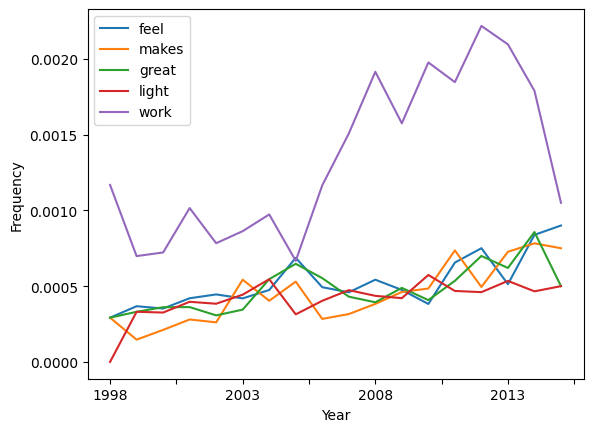

In [20]:
increasing = mk_df.sort_values("s",ascending=False).head(5).index
top.loc[increasing].T.plot()

#the following instrucitons add labels to the x and y axes
plt.xlabel("Year")
plt.ylabel("Frequency")

Then we do the same thing for the top 5 words with the lowest _s_ values, which we assign to a variable we will call **decreasing**.

Text(0, 0.5, 'Frequency')

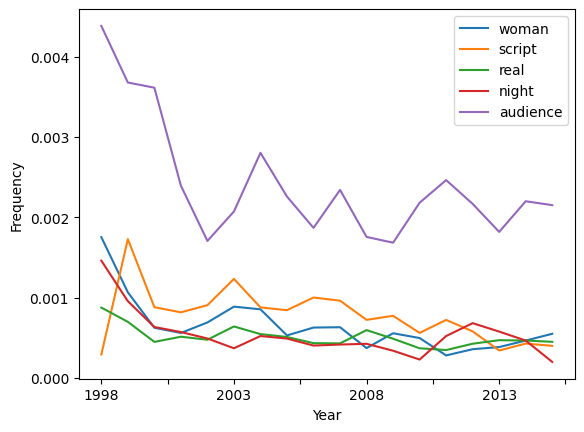

In [21]:
decreasing = mk_df.sort_values("s",ascending=True).head().index
ax = top.loc[decreasing].T.plot()
plt.xlabel("Year")
plt.ylabel("Frequency")